### Problem Statement: To determine whether the credit card transaction done was fraudulent(1) or genuine(0).

<hr>

In [1]:
# !pip install -r requirements.txt

In [2]:
# dataset source : https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/discussion/373669

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
 
from ydata_profiling import ProfileReport # for auto EDA


import warnings 
warnings.filterwarnings("ignore")

In [4]:
# !pip install ydata-profiling

In [5]:
credit_data = pd.read_csv("creditcard.csv")

In [6]:
credit_data.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
49993,44296.0,-1.525670,-0.629246,1.876750,-1.027794,-1.106091,-0.656054,-0.724725,0.696758,1.140440,...,0.362205,0.707107,-0.063647,0.437923,0.146038,0.301622,-0.018963,-0.101739,83.30,0
96647,65866.0,-5.114316,3.845382,-2.341091,0.441534,-1.933386,-0.271449,-1.969172,2.911121,-1.007325,...,0.136774,-1.380539,0.512094,-0.882313,-0.214806,-0.970785,-2.930789,-0.342024,11.90,0
93663,64533.0,1.261965,0.161640,-1.224711,0.043745,2.308316,3.276779,-0.234486,0.775000,-0.312174,...,-0.518345,-1.728405,0.179473,0.917647,0.405342,-0.822661,0.010820,0.025058,18.40,0
205308,135683.0,2.060413,-0.310339,-2.787377,-0.776837,2.499195,3.163703,-0.399284,0.715728,0.448370,...,0.242398,0.745062,0.039677,0.737419,0.303705,-0.087639,-0.000754,-0.065312,1.74,0
255916,157460.0,-0.569587,0.351394,0.427554,-0.892265,1.033150,-1.406179,1.174763,-0.553863,0.214019,...,-0.187892,-0.345102,0.245060,0.035538,-1.045496,-0.102883,-0.286118,0.072332,1.29,0


In [7]:
print(f' We have {credit_data.shape[0]} credit card transactions data in our dataset.')

 We have 284807 credit card transactions data in our dataset.


In [8]:
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

V1 to V28 columns has been hidden on purpose due to various privacy reasons and also it is mentioned that V1 to V28 are the principle components obtained after PCA reduction

In [9]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

<p style="font-size: 17px; color: blue;">
 Features V1, V2, … V28 are the principal components obtained with PCA. The only features which have not been transformed with PCA are 'Time' and 'Amount'. </p>
 
- **Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.**
- **The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning.**
- **Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.**



In [10]:
credit_data.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

<div style = "color:red;">
Observation:<br>
- class is categorical data with 2 categories: 0 and 1.<br>
- highly imbalanced dataset with 492 anomaly transactions.
</div>

In [11]:
print(f'There are only {credit_data[credit_data.Class == 1].shape[0]} number of fraudulent transactions out of total {credit_data.shape[0]} total transactions.')

There are only 492 number of fraudulent transactions out of total 284807 total transactions.


In [12]:
print(f'Fraud transaction happened only {round(credit_data[credit_data.Class == 1].shape[0]/credit_data.shape[0] * 100 , 3)} % of time.')

Fraud transaction happened only 0.173 % of time.


### thus our data is highly imbalanced and if we try training any supervised algorithm with this data, then it will most likely mark fraud transaction as geniuene.

<p style="font-size: 18px; color: blue;">What is Imbalanced Data?</p>
<p>Imbalanced data refers to a situation in machine learning where one category or class of data (called the minority class) is much less common than another category (the majority class). This imbalance can be a problem because machine learning models may not work well when they are heavily biased towards the majority class.</p>

<p style="font-size: 18px; color: blue;">Techniques to Handle Imbalanced Data</p>
<p><strong>Resampling Techniques:</strong> These methods involve adjusting the number of examples in each class. Oversampling creates more copies of the minority class to balance the dataset, while undersampling reduces the number of majority class examples to balance the dataset.</p>

<p><strong>Cost-Sensitive Learning:</strong> This approach involves modifying the loss function of the model to give more weight to the minority class. It assigns a higher "cost" to mistakes in the minority class, making the model more sensitive to misclassifying examples from the minority class.</p>

<p><strong>Ensemble Methods:</strong> These methods are like teamwork for models. Instead of relying on one model, you use multiple models and combine their predictions. This can help effectively handle imbalanced data.</p>

<p><strong>Thresholding:</strong> You can change the decision threshold of your model. By making the threshold higher, you make your model more cautious, making it more likely to classify examples as the minority class. Lowering the threshold makes it more likely to classify examples as the majority class.</p>

<p><strong>Generative Adversarial Networks (GANs):</strong> GANs are used to create artificial new examples of the minority class. These artificial synthetic examples are generated by the GAN to balance out the dataset, making it more even.</p>


In [13]:
credit_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
credit_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [15]:
credit_data.duplicated().sum()

1081

<div style = "color:red;">
Observation:<br>
- no missing values<br>
- 1081 transactions have been duplicated( maybe same amount transaction done twice)
</div>

In [16]:
credit_data.drop_duplicates(inplace = True)

#### Pandas Profiler - Auto EDA

In [17]:
# report = ProfileReport(credit_data, title="Profiling Report")
# report.to_file('ProfileReport.html')

In [18]:
# lets see the transactions count !

print(f' Minimum transaction amount: {credit_data.Amount.min()}')
print(f' Maximum transaction amount: {credit_data.Amount.max()}')


 Minimum transaction amount: 0.0
 Maximum transaction amount: 25691.16


In [19]:
credit_data.Amount.describe()

count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

<div style = "color:red;">
Observation:<br>
- 0 rupees transaction of credit card means?
</div>

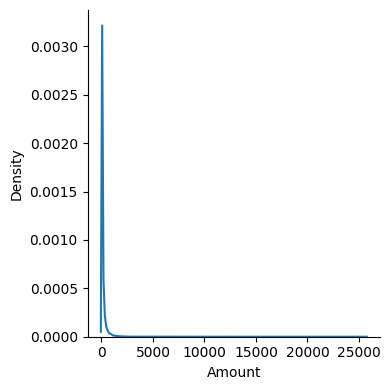

In [20]:

sns.displot(data = credit_data, x = "Amount", kind = 'kde', height=4)


In [21]:
fraud_df = credit_data[credit_data.Class == 1]

fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


Text(0.5, 0, 'Time')

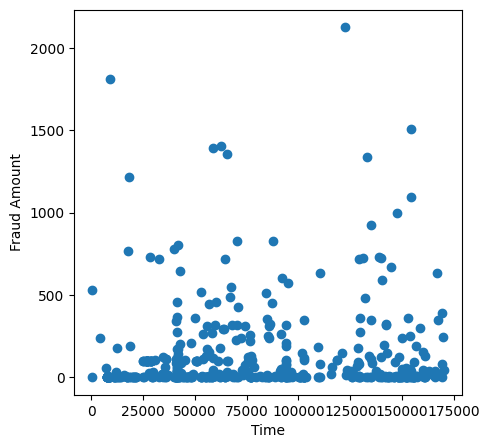

In [22]:
plt.figure(figsize = (5,5))

plt.subplot(1,1,1)
plt.scatter(fraud_df.Time, fraud_df.Amount)
plt.ylabel('Fraud Amount')
plt.xlabel('Time')

<div style = 'color:red'>
most of the fraud amount is near 0 and less than 200  and only few of them are above 1500$.


In [23]:
print(f' There are {fraud_df[fraud_df.Amount == 0].shape[0]}  number of frauds with amount 0.00 $ out of {fraud_df.shape[0]} frauds.')

 There are 25  number of frauds with amount 0.00 $ out of 473 frauds.


In [24]:
print(f' There are only {fraud_df[fraud_df.Amount >= 1000 ].shape[0]}  number of frauds with amount greater than equal to 1000$, out of {fraud_df.shape[0]} frauds.')

 There are only 9  number of frauds with amount greater than equal to 1000$, out of 473 frauds.


In [25]:
print(f' Maximum fraud amount: {fraud_df.Amount.max()}')

 Maximum fraud amount: 2125.87


<Axes: >

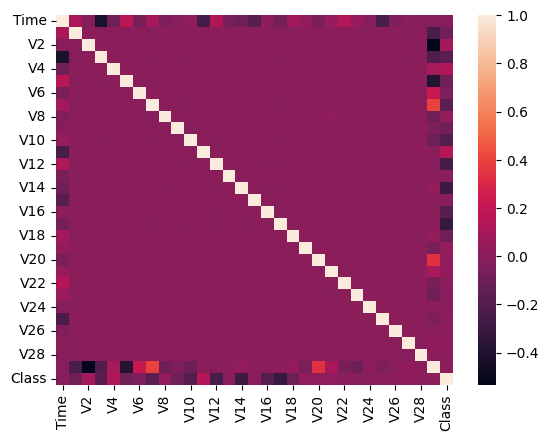

In [26]:
sns.heatmap(credit_data.corr())

no features are much corelated with each other. maybe they are but we cant see them cause of imbalanced dataset. 



# scaling and splitting 

#### scaling the remaining columns time and amount using robust scaler cause robust scalar handles outliers pretty well.


<img src = 'https://media.geeksforgeeks.org/wp-content/uploads/20230428205714/for4.png'>

In [27]:
from sklearn.preprocessing import RobustScaler

robust_scaler = RobustScaler()

credit_data['scaled_amount'] = robust_scaler.fit_transform(credit_data.Amount.values.reshape(-1,1))
credit_data['scaled_time'] = robust_scaler.fit_transform(credit_data.Time.values.reshape(-1,1))
credit_data.drop(['Time','Amount'], axis = 1 , inplace = True)

In [28]:
print('Final Scaled data looks like:')
credit_data.head()

Final Scaled data looks like:


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


<p style="font-size: 18px; color: blue;">
We need to create a sub-sample of our actual dataframe i.e undersampling </p>

**1) It would reduce the overfitting error where most of the data are being predicted as geniuene due to imbalanced dataset.** <br>

**2) It would allow us to see the actual correlation between various features , which we are not able to see right now due to the imbalance in dataset.**



In [29]:
from sklearn.utils import shuffle
credit_data = shuffle(credit_data)

In [30]:
fraud_df = credit_data[credit_data.Class == 1]
geniuene_df = credit_data[credit_data.Class == 0]

In [31]:
fraud_df.shape

(473, 31)

In [32]:
geniuene_df = geniuene_df[0:fraud_df.shape[0]]

In [33]:
geniuene_df.shape

(473, 31)

In [34]:
new_df = pd.concat([fraud_df, geniuene_df])
new_df = shuffle(new_df)

In [35]:
new_df.isna().sum().max()

0

In [36]:
new_df.shape


(946, 31)

In [37]:
new_df.Class.value_counts()
# equally distributed

Class
1    473
0    473
Name: count, dtype: int64

Text(0.5, 1.0, 'Equally distributed new dataframe')

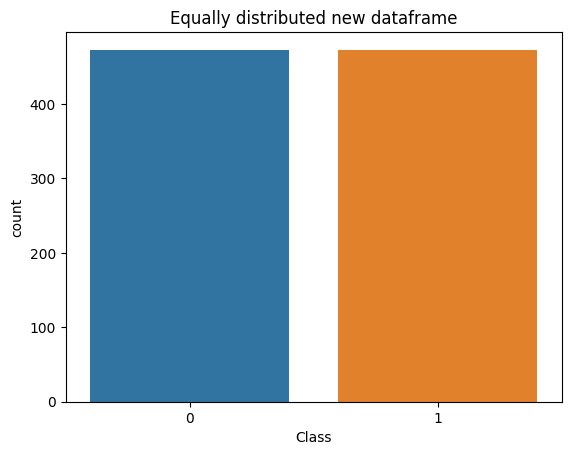

In [38]:
sns.countplot(data = new_df, x= 'Class')
plt.title('Equally distributed new dataframe')

 lets work with this new df

<Axes: >

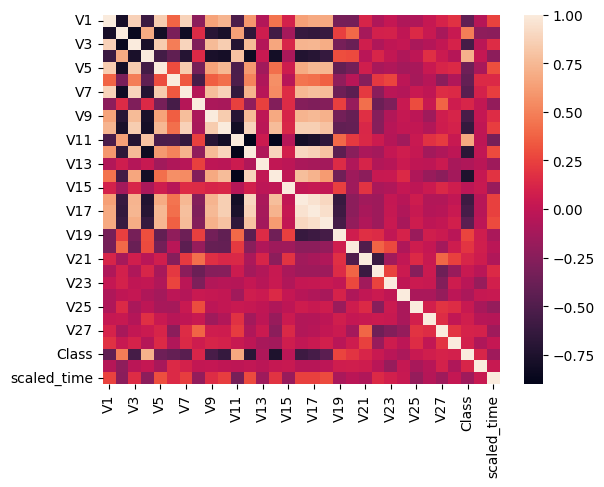

In [39]:
sns.heatmap(new_df.corr())

<Axes: >

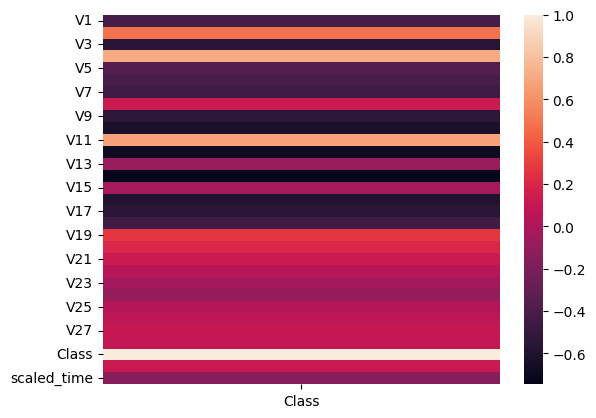

In [40]:
sns.heatmap(new_df.corr()[['Class']])

In [41]:
correlation_with_class = new_df.corr()['Class']
sorted_correlation = correlation_with_class.sort_values(ascending = False)

sorted_correlation

Class            1.000000
V4               0.712925
V11              0.670658
V2               0.482832
V19              0.263775
V20              0.195701
V21              0.122952
V8               0.122733
scaled_amount    0.116922
V27              0.102982
V28              0.092424
V26              0.072996
V22              0.041606
V25              0.034148
V15             -0.024139
V23             -0.037583
V13             -0.083330
V24             -0.092484
scaled_time     -0.149763
V5              -0.364470
V6              -0.408594
V1              -0.423221
V18             -0.450743
V7              -0.457226
V9              -0.539513
V17             -0.549127
V3              -0.559328
V16             -0.592327
V10             -0.628241
V12             -0.680800
V14             -0.745640
Name: Class, dtype: float64

<div style = "color:red;">
V4, V11, V2, V19 having positive correlation with class.
V16, V10, V12, V14 having negative correlation with class.

In [42]:
# train test split
X = new_df.drop('Class', axis = 1)
y = new_df['Class']

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount,scaled_time
189370,-0.272683,0.748120,-0.669013,-1.251962,1.302950,-0.500912,1.904997,-0.307776,-0.974156,-0.708980,...,0.287103,0.667597,-0.131192,0.401438,0.103733,0.061050,0.056115,0.157952,1.122097,0.513255
250864,-0.592108,0.681572,1.103087,2.992929,-0.756090,0.831429,1.784269,-0.108557,-1.228641,0.578395,...,-0.187053,-0.534051,0.642823,-0.056625,-0.740634,-0.497617,0.098728,-0.032970,4.064525,0.827486
27659,-0.818109,0.589414,2.107922,0.879415,0.092654,0.545469,-0.172549,0.226408,0.217401,-0.223236,...,0.113636,0.482096,-0.122901,-0.416597,-0.324139,-0.325281,-0.045716,0.179483,-0.289529,-0.588125
96254,-0.301638,1.147250,1.548066,0.713510,0.193808,-0.215371,0.571265,-0.112103,-0.527087,-0.193157,...,-0.068658,-0.178601,-0.043848,-0.152825,-0.549893,-0.613682,0.069941,0.173561,-0.236407,-0.223337
74496,-7.347955,2.397041,-7.572356,5.177819,-2.854838,-1.795239,-8.783235,0.437157,-3.740598,-8.332863,...,-0.175273,0.543325,-0.547955,-0.503722,-0.310933,-0.163986,1.197895,0.378187,-0.294396,-0.341725


In [45]:
X_train.shape

(756, 30)

In [46]:
X_test.shape

(190, 30)

### Supervised - Classifiers

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

In [48]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,cross_val_predict

Random Forest

In [49]:
random_forest = RandomForestClassifier(n_estimators=100, max_depth = 1)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")

Training Accuracy    : 92.06 %
Model Accuracy Score : 92.11 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       107
           1       1.00      0.82      0.90        83

    accuracy                           0.92       190
   macro avg       0.94      0.91      0.92       190
weighted avg       0.93      0.92      0.92       190

--------------------------------------------------------


In [50]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(random_forest, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.90789474 0.89403974 0.93377483 0.90728477 0.93377483]
Average Accuracy: 0.9153537818055071


SVM

In [51]:
svm = SVC()
model3=svm.fit(X_train,y_train)
y_pred3=model3.predict(X_test)


print(f'classification report :{classification_report(y_test,y_pred3)}')
print('*************************************')
print(f'confusion matrix :{confusion_matrix(y_test,y_pred3)}')
print('*************************************')
print(f'accuracy score :{accuracy_score(y_test,y_pred3)}')

classification report :              precision    recall  f1-score   support

           0       0.91      0.99      0.95       107
           1       0.99      0.87      0.92        83

    accuracy                           0.94       190
   macro avg       0.95      0.93      0.93       190
weighted avg       0.94      0.94      0.94       190

*************************************
confusion matrix :[[106   1]
 [ 11  72]]
*************************************
accuracy score :0.9368421052631579


In [52]:
cv_scores = cross_val_score(svm, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", round(cv_scores.mean(),2))

Cross-Validation Scores: [0.93421053 0.93377483 0.94039735 0.92715232 0.93377483]
Average Accuracy: 0.93


Logistic Regression

In [53]:
model = LogisticRegression(penalty='l1', solver='liblinear')

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9368421052631579


In [54]:

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.93421053 0.94039735 0.92715232 0.91390728 0.94701987]
Average Accuracy: 0.9325374695015685


using isolation forest unsupervised learning

In [59]:
from sklearn.ensemble import IsolationForest

iso = IsolationForest()

# Fit the model to your data
iso.fit(X_train)

# Predict anomalies
y_pred_iso = iso.predict(X_test)

print(f'classification report :{classification_report(y_test,y_pred_iso)}')
print('*************************************')
print(f'confusion matrix :{confusion_matrix(y_test,y_pred_iso)}')
print('*************************************')
print(f'accuracy score :{accuracy_score(y_test,y_pred_iso)}')


classification report :              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00       107
           1       0.38      0.80      0.52        83

    accuracy                           0.35       190
   macro avg       0.13      0.27      0.17       190
weighted avg       0.17      0.35      0.23       190

*************************************
confusion matrix :[[  0   0   0]
 [  0   0 107]
 [ 17   0  66]]
*************************************
accuracy score :0.3473684210526316


In [60]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(iso, X_train, y_train, cv=5, scoring='accuracy')
print("Cross-Validation Scores:", cv_scores)
print("Average Accuracy:", cv_scores.mean())

Cross-Validation Scores: [0.33552632 0.29801325 0.43708609 0.47019868 0.44370861]
Average Accuracy: 0.396906587661206
